Data source: https://huggingface.co/datasets/codesignal/lending-club-loan-accepted/tree/main

# **1. Load python packages and dataset**

In [1]:
# LIBRARIES -----
!pip install xlsxwriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.4 MB/s eta 0:00:00


In [2]:
#Mount google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the transactions data
df = pd.read_csv('/content/drive/MyDrive/Lending_Club_Analysis/data/accepted_2007_to_2018Q4.csv', low_memory=False)

In [4]:
df.shape

(2260701, 151)

In [5]:
#First 5 rows of data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

As part of this analysis we're interested to dive deep into the loan records that are either Fully Paid or is charged off.

In [6]:
#excluding rows with loan_status other than 'Fully Paid' and 'Charged Off'
df=df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
df.shape

(1345310, 151)

# **2.0 Generate an exhaustive Data Quality Report**

In [8]:
from google.colab import files
files.upload()  # This will prompt you to upload the dq_report.py file from your local machine

import shutil

# Assuming the dq_report.py file is uploaded to /content directory
shutil.move("dq_report.py", "/content/dq_report.py")

Saving dq_report.py to dq_report.py


'/content/dq_report.py'

In [9]:
# Import custom functions from dq_report.py
from dq_report import data_quality_report, export_report_to_excel

# Generate the data quality report
report = data_quality_report(df)

# Export the report to an Excel file
export_report_to_excel(report)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Data quality report exported successfully to data_quality_report.xlsx


# **Summary of DQ report:**

**Numerical and categorical variables:**<br>
113 numerical variables<br>
38 categorical variables

**Null values distributions**<br>
Number of columns with null values > 40% : 58<br>
Number of columns with null values > 10% and null values < 40% : 1 i.e;mths_since_recent_inq<br>
Number of columns with null values > 0% and null values < 10% : 40<br>
Column with no null values: id
Number of columns with no null values: 52



# **3.0 Exploratory Data Analysis and Data Cleaning**

**Based on the data dictionary and discussion with stakeholders it has been agreed that columns with null values > 40% should be dropped**

In [10]:
df[df.columns[(df.isnull().sum()/len(df))>=0.4]].shape

(1345310, 58)

In [11]:
#removing columns with null values > 40%
df=df[df.columns[(df.isnull().sum()/len(df))<0.4]]
df.shape

(1345310, 93)

 **Creating 2 different excel workbooks for 2 types of variables:**<br>
**1. Variables with missing values** <br>
**2. Variables with no missing values** <br>

**Each workbook has has seperate sheets for all the variables. Each sheet will have the following statistical information for the variable when grouped by our target variable loan_status: count, mean, median, standard deviation, min, 0th percentile, 25th percentile, 50th percentile, 50th percentile, 75th percentile, 100th percentile, max and missing value%**

In [12]:
files.upload()  # This will prompt you to upload the analysis_functions_columns.py file from your local machine

# Assuming the analysis_functions_columns.py file is uploaded to /content directory
shutil.move("analysis_functions_columns.py", "/content/analysis_functions_columns.py")

# Import custom functions from analysis_functions_columns.py
from analysis_functions_columns import analyze_columns_with_missing_values_by_loan_status, analyze_columns_by_loan_status, export_report_to_excel

# Generate the descriptive statistics report for columns with missing values
results_missing_values = analyze_columns_with_missing_values_by_loan_status(df)
export_report_to_excel(results_missing_values, '/content/drive/MyDrive/Lending_Club_Analysis/Output_files/statistics_columns_with_missing_values.xlsx')

# Generate the descriptive statistics report report for columns with no missing values
results_no_missing_values = analyze_columns_by_loan_status(df)
export_report_to_excel(results_no_missing_values, '/content/drive/MyDrive/Lending_Club_Analysis/Output_files/complete_columns_statistics.xlsx')

Saving analysis_functions_columns.py to analysis_functions_columns.py
Report exported successfully to /content/drive/MyDrive/Lending_Club_Analysis/Output_files/statistics_columns_with_missing_values.xlsx
Report exported successfully to /content/drive/MyDrive/Lending_Club_Analysis/Output_files/complete_columns_statistics.xlsx


# **3.1 Analysing columns with null values < 40%**

**Based on data in the 'statistics_columns_with_missing_values.xls' workbook and the data quality report, conducting univariate and bivariate analysis on each column to impute the missing values**

In [13]:
#Functions for data cleaning

def outlier_thresholds(data, column):
    """
    Calculate the lower and upper outlier thresholds for a given column in a DataFrame.

    Parameters:
    - data: pd.DataFrame - The DataFrame containing the data.
    - column: str - The name of the column to calculate outlier thresholds for.

    Returns:
    - lower_bound: float - The lower outlier threshold.
    - upper_bound: float - The upper outlier threshold.
    """
    # Calculate Q1 and Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

**Column: dti**

In [14]:
#creating 2 different datasets having loan_status as fully paid and charged off
df_fully_paid=df[df['loan_status']=='Fully Paid']
df_charged_off=df[df['loan_status']=='Charged Off']

In [15]:
len(df_fully_paid)

1076751

In [16]:
len(df_charged_off)

268559

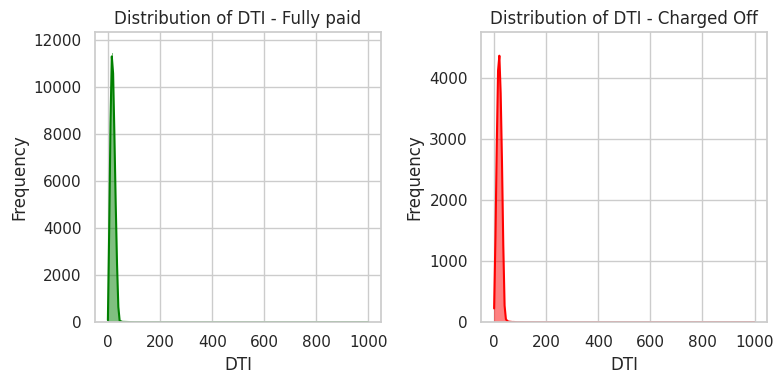

In [17]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['dti'], kde=True, color='green')
plt.title('Distribution of DTI - Fully paid')
plt.xlabel('DTI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['dti'], kde=True, color='red')
plt.title('Distribution of DTI - Charged Off')
plt.xlabel('DTI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

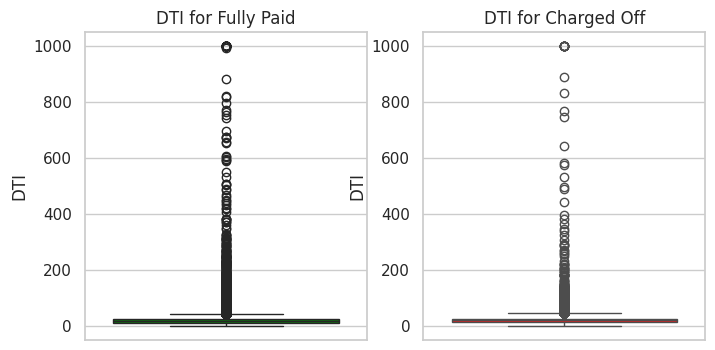

In [18]:
# Plotting Box Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['dti'].dropna(), color='green')
plt.title('DTI for Fully Paid')
plt.ylabel('DTI')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['dti'].dropna(), color='red')
plt.title('DTI for Charged Off')
plt.ylabel('DTI')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [19]:
dti_lower_bound, dti_upper_bound = outlier_thresholds(df, 'dti')
df[(df['dti']< dti_lower_bound) | (df['dti']> dti_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     3815
Charged Off    1658
Name: count, dtype: int64

In [20]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [21]:
df[df['dti'].isnull()]['loan_status'].value_counts()

loan_status
Fully Paid     303
Charged Off     71
Name: count, dtype: int64

**Column: revol_util**

In [22]:
len(df_fully_paid)

1076751

In [23]:
len(df_charged_off)

268559

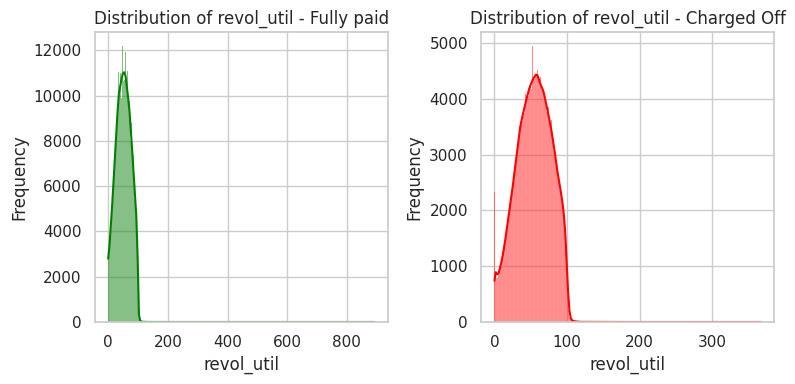

In [24]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['revol_util'], kde=True, color='green')
plt.title('Distribution of revol_util - Fully paid')
plt.xlabel('revol_util')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['revol_util'], kde=True, color='red')
plt.title('Distribution of revol_util - Charged Off')
plt.xlabel('revol_util')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

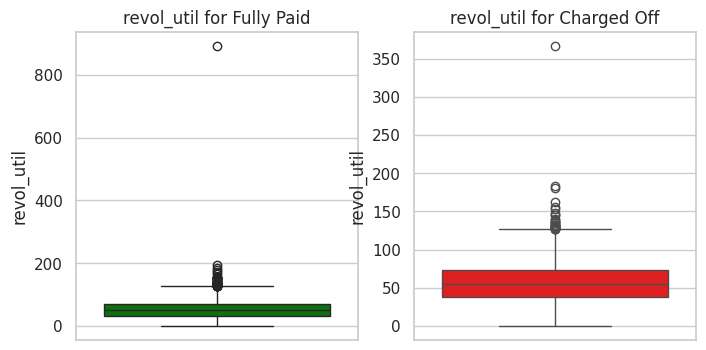

In [25]:
# Plotting Box Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['revol_util'].dropna(), color='green')
plt.title('revol_util for Fully Paid')
plt.ylabel('revol_util')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['revol_util'].dropna(), color='red')
plt.title('revol_util for Charged Off')
plt.ylabel('revol_util')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [26]:
revol_util_lower_bound, revol_util_upper_bound = outlier_thresholds(df, 'revol_util')
df[(df['revol_util']< revol_util_lower_bound) | (df['revol_util']> revol_util_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     44
Charged Off    28
Name: count, dtype: int64

In [27]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: collections_12_mths_ex_med and tot_coll_amt**

In [28]:
df.shape

(1345310, 93)

In [29]:
100*df['loan_status'].value_counts()/len(df)

loan_status
Fully Paid     80.037389
Charged Off    19.962611
Name: count, dtype: float64

In [30]:
df[df['collections_12_mths_ex_med']>0].shape

(21041, 93)

In [31]:
100*df[df['collections_12_mths_ex_med']>0]['loan_status'].value_counts()/len(df[df['collections_12_mths_ex_med']>0])

loan_status
Fully Paid     74.506915
Charged Off    25.493085
Name: count, dtype: float64

In [32]:
100*df[df['collections_12_mths_ex_med']==0]['loan_status'].value_counts()/len(df[df['collections_12_mths_ex_med']==0])

loan_status
Fully Paid     80.124874
Charged Off    19.875126
Name: count, dtype: float64

In [33]:
df[df['tot_coll_amt']>0].shape

(195766, 93)

In [34]:
100*df[df['tot_coll_amt']>0]['loan_status'].value_counts()/len(df[df['tot_coll_amt']>0])

loan_status
Fully Paid     77.778572
Charged Off    22.221428
Name: count, dtype: float64

In [35]:
100*df[df['tot_coll_amt']==0]['loan_status'].value_counts()/len(df[df['tot_coll_amt']==0])

loan_status
Fully Paid     80.153824
Charged Off    19.846176
Name: count, dtype: float64

**Column: tot_cur_bal**

In [36]:
len(df_fully_paid)

1076751

In [37]:
len(df_charged_off)

268559

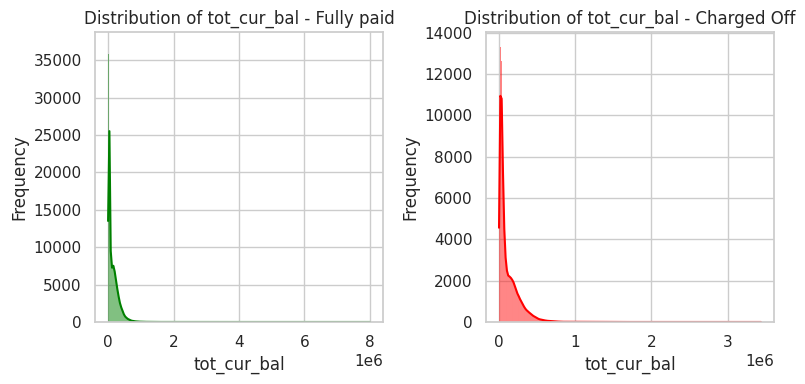

In [38]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['tot_cur_bal'], kde=True, color='green')
plt.title('Distribution of tot_cur_bal - Fully paid')
plt.xlabel('tot_cur_bal')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['tot_cur_bal'], kde=True, color='red')
plt.title('Distribution of tot_cur_bal - Charged Off')
plt.xlabel('tot_cur_bal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

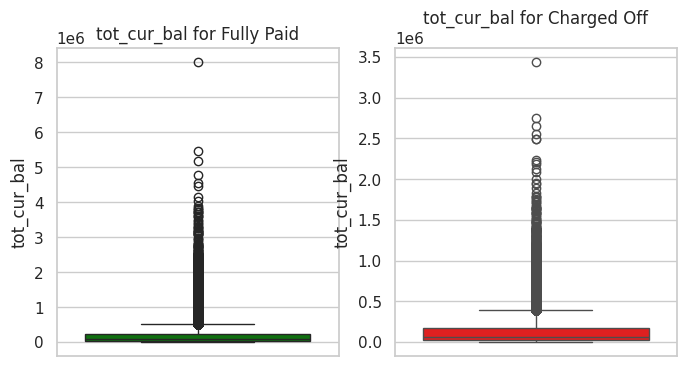

In [39]:
# Plotting Box Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['tot_cur_bal'].dropna(), color='green')
plt.title('tot_cur_bal for Fully Paid')
plt.ylabel('tot_cur_bal')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['tot_cur_bal'].dropna(), color='red')
plt.title('tot_cur_bal for Charged Off')
plt.ylabel('tot_cur_bal')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [40]:
tot_cur_bal_lower_bound, tot_cur_bal_upper_bound = outlier_thresholds(df, 'tot_cur_bal')
df[(df['tot_cur_bal']< tot_cur_bal_lower_bound) | (df['tot_cur_bal']> tot_cur_bal_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     38552
Charged Off     5617
Name: count, dtype: int64

In [41]:
print('lower outlier value:', tot_cur_bal_lower_bound)
print('upper outlier value:', tot_cur_bal_upper_bound)

lower outlier value: -242515.0
upper outlier value: 482653.0


In [42]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [43]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['tot_cur_bal'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,0.00,NaN
1,5.0,8625.00,8625.00
2,10.0,14065.20,5440.20
3,15.0,19152.00,5086.80
4,20.0,24169.00,5017.00
5,25.0,29423.00,5254.00
6,30.0,35307.00,5884.00
7,35.0,42200.70,6893.70
8,40.0,50952.00,8751.30
9,45.0,62943.00,11991.00


**Column: avg_cur_bal**

In [44]:
len(df_fully_paid)

1076751

In [45]:
len(df_charged_off)

268559

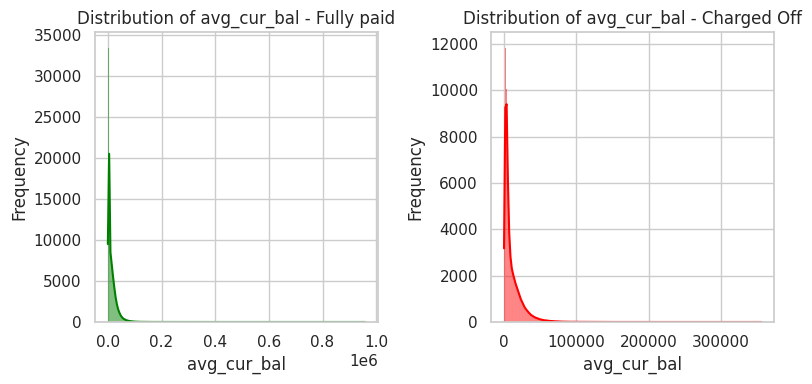

In [46]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['avg_cur_bal'], kde=True, color='green')
plt.title('Distribution of avg_cur_bal - Fully paid')
plt.xlabel('avg_cur_bal')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['avg_cur_bal'], kde=True, color='red')
plt.title('Distribution of avg_cur_bal - Charged Off')
plt.xlabel('avg_cur_bal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

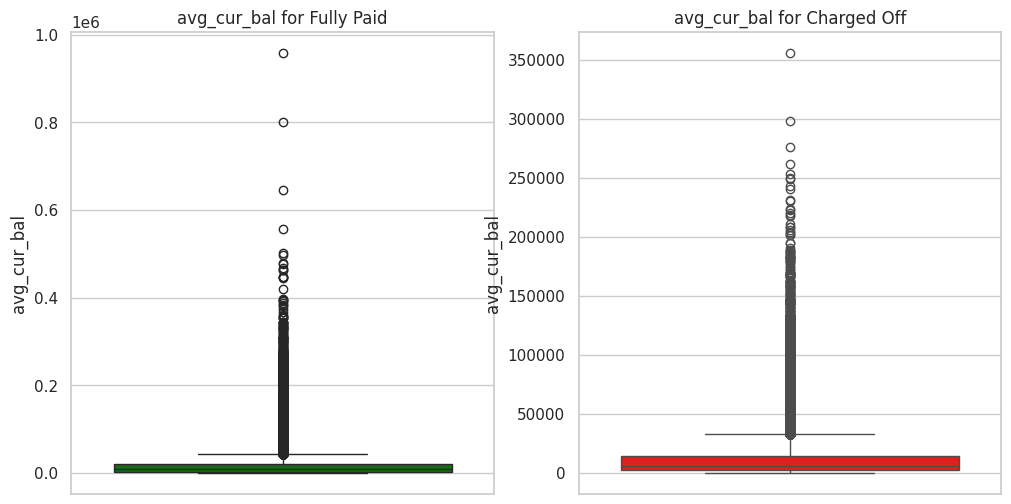

In [47]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['avg_cur_bal'].dropna(), color='green')
plt.title('avg_cur_bal for Fully Paid')
plt.ylabel('avg_cur_bal')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['avg_cur_bal'].dropna(), color='red')
plt.title('avg_cur_bal for Charged Off')
plt.ylabel('avg_cur_bal')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [48]:
avg_cur_bal_lower_bound, avg_cur_bal_upper_bound = outlier_thresholds(df, 'avg_cur_bal')
df[(df['avg_cur_bal']< avg_cur_bal_lower_bound) | (df['avg_cur_bal']> avg_cur_bal_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     59362
Charged Off     8161
Name: count, dtype: int64

In [49]:
print('lower outlier value:', avg_cur_bal_lower_bound)
print('upper outlier value:', avg_cur_bal_upper_bound)

lower outlier value: -20323.0
upper outlier value: 42141.0


In [50]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [51]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['avg_cur_bal'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,0.0,NaN
1,5.0,1100.0,1100.0
2,10.0,1640.0,540.0
3,15.0,2128.0,488.0
4,20.0,2605.0,477.0
5,25.0,3101.0,496.0
6,30.0,3643.0,542.0
7,35.0,4279.0,636.0
8,40.0,5058.0,779.0
9,45.0,6057.0,999.0


**Column: bc_open_to_buy**

In [52]:
len(df_fully_paid)

1076751

In [53]:
len(df_charged_off)

268559

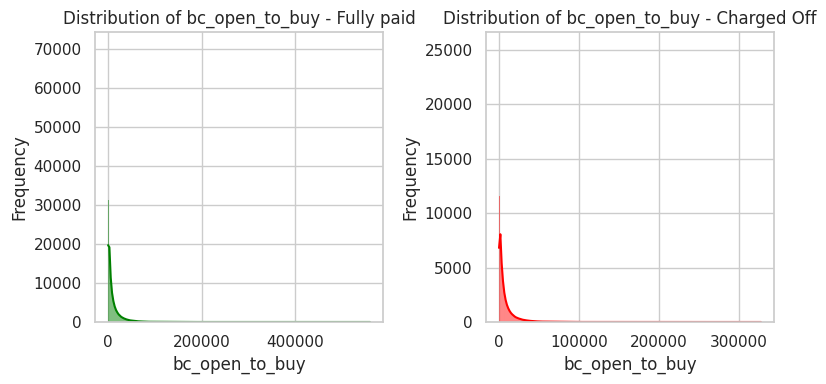

In [54]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['bc_open_to_buy'], kde=True, color='green')
plt.title('Distribution of bc_open_to_buy - Fully paid')
plt.xlabel('bc_open_to_buy')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['bc_open_to_buy'], kde=True, color='red')
plt.title('Distribution of bc_open_to_buy - Charged Off')
plt.xlabel('bc_open_to_buy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

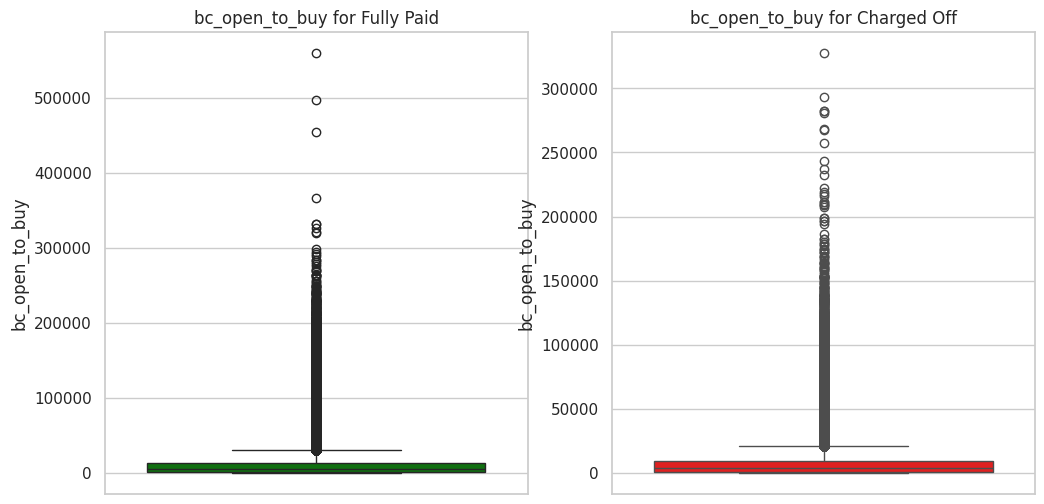

In [55]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['bc_open_to_buy'].dropna(), color='green')
plt.title('bc_open_to_buy for Fully Paid')
plt.ylabel('bc_open_to_buy')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['bc_open_to_buy'].dropna(), color='red')
plt.title('bc_open_to_buy for Charged Off')
plt.ylabel('bc_open_to_buy')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [56]:
bc_open_to_buy_lower_bound, bc_open_to_buy_upper_bound = outlier_thresholds(df, 'bc_open_to_buy')
df[(df['bc_open_to_buy']< bc_open_to_buy_lower_bound) | (df['bc_open_to_buy']> bc_open_to_buy_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     98329
Charged Off    13234
Name: count, dtype: int64

In [57]:
len(df[(df['bc_open_to_buy']< bc_open_to_buy_lower_bound) | (df['bc_open_to_buy']> bc_open_to_buy_upper_bound)])

111563

In [58]:
print('lower outlier value:', bc_open_to_buy_lower_bound)
print('upper outlier value:', bc_open_to_buy_upper_bound)

lower outlier value: -14914.5
upper outlier value: 28761.5


In [59]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: bc_util**

In [60]:
len(df_fully_paid)

1076751

In [61]:
len(df_charged_off)

268559

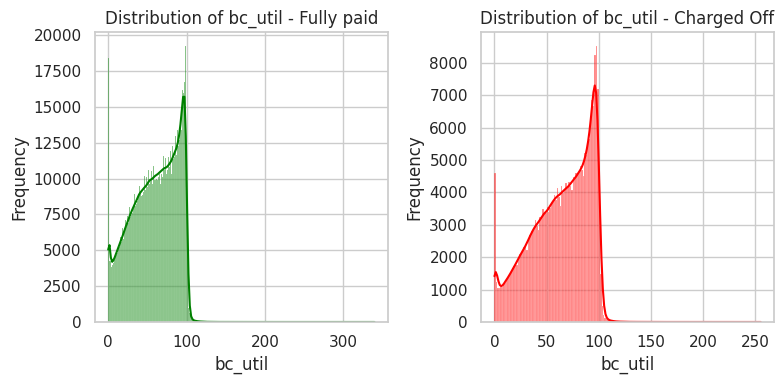

In [62]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['bc_util'], kde=True, color='green')
plt.title('Distribution of bc_util - Fully paid')
plt.xlabel('bc_util')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['bc_util'], kde=True, color='red')
plt.title('Distribution of bc_util - Charged Off')
plt.xlabel('bc_util')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

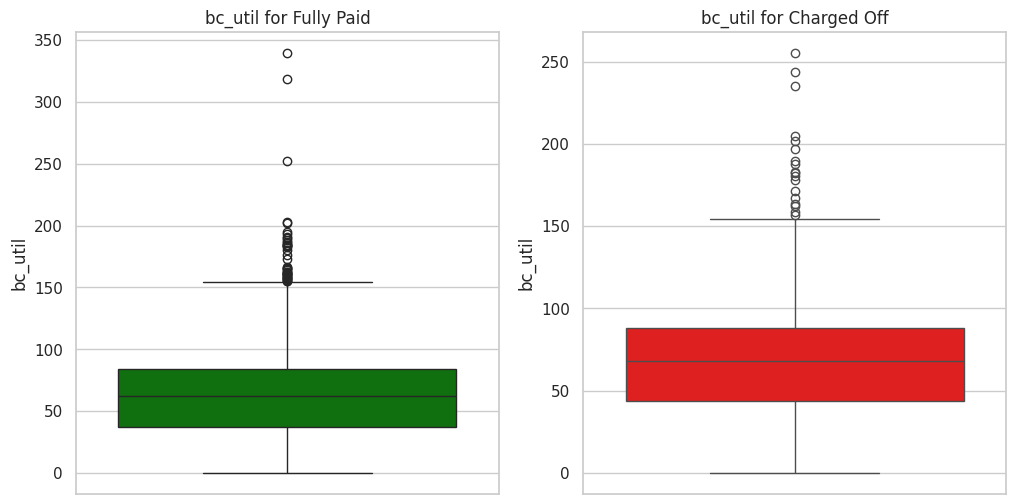

In [63]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['bc_util'].dropna(), color='green')
plt.title('bc_util for Fully Paid')
plt.ylabel('bc_util')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['bc_util'].dropna(), color='red')
plt.title('bc_util for Charged Off')
plt.ylabel('bc_util')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [64]:
bc_util_lower_bound, bc_util_upper_bound = outlier_thresholds(df, 'bc_util')
df[(df['bc_util']< bc_util_lower_bound) | (df['bc_util']> bc_util_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     42
Charged Off    18
Name: count, dtype: int64

In [65]:
len(df[(df['bc_util']< bc_util_lower_bound) | (df['bc_util']> bc_util_upper_bound)])

60

In [66]:
print('lower outlier value:', bc_util_lower_bound)
print('upper outlier value:', bc_util_upper_bound)

lower outlier value: -31.450000000000003
upper outlier value: 154.55


In [67]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: mort_acc**

In [68]:
len(df_fully_paid)

1076751

In [69]:
len(df_charged_off)

268559

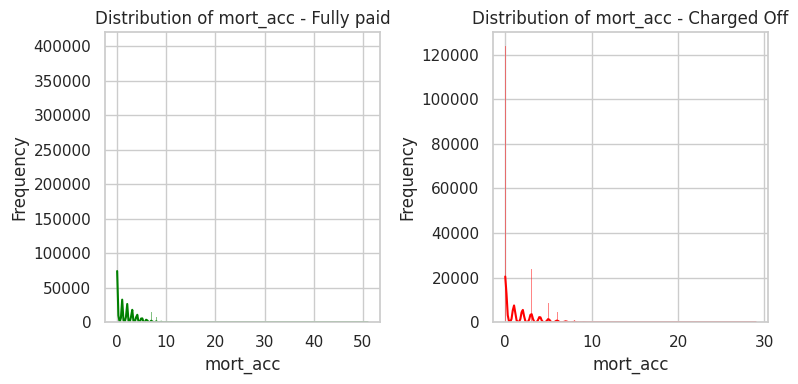

In [70]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['mort_acc'], kde=True, color='green')
plt.title('Distribution of mort_acc - Fully paid')
plt.xlabel('mort_acc')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['mort_acc'], kde=True, color='red')
plt.title('Distribution of mort_acc - Charged Off')
plt.xlabel('mort_acc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

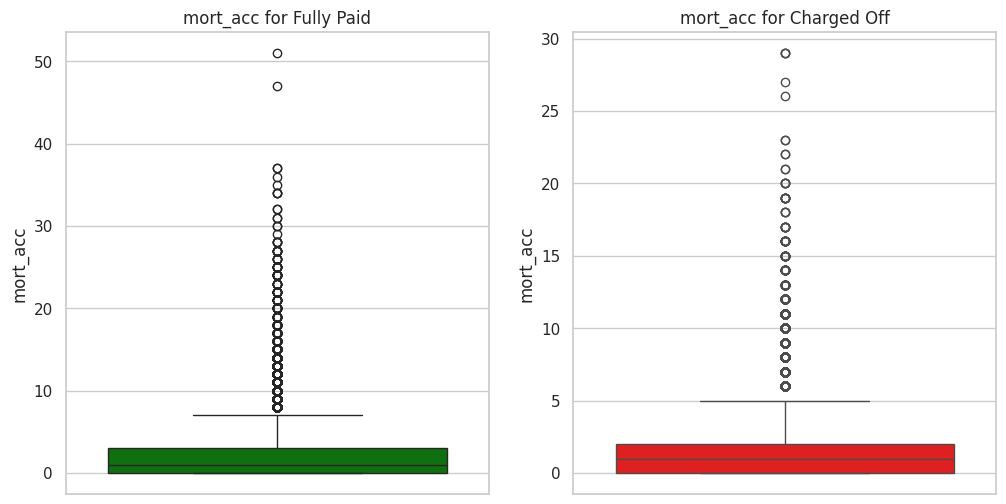

In [71]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['mort_acc'].dropna(), color='green')
plt.title('mort_acc for Fully Paid')
plt.ylabel('mort_acc')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['mort_acc'].dropna(), color='red')
plt.title('mort_acc for Charged Off')
plt.ylabel('mort_acc')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [72]:
mort_acc_lower_bound, mort_acc_upper_bound = outlier_thresholds(df, 'mort_acc')
df[(df['mort_acc']< mort_acc_lower_bound) | (df['mort_acc']> mort_acc_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     15450
Charged Off     2344
Name: count, dtype: int64

In [73]:
len(df[(df['mort_acc']< mort_acc_lower_bound) | (df['mort_acc']> mort_acc_upper_bound)])

17794

In [74]:
print('lower outlier value:', mort_acc_lower_bound)
print('upper outlier value:', mort_acc_upper_bound)

lower outlier value: -4.5
upper outlier value: 7.5


In [75]:
print(len(df[df['mort_acc']>0]))
print(len(df[df['mort_acc']==0]))

774192
523837


In [76]:
df['mort_acc'].mode()

0    0.0
Name: mort_acc, dtype: float64

In [77]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: num_actv_rev_tl**

In [78]:
len(df_fully_paid)

1076751

In [79]:
len(df_charged_off)

268559

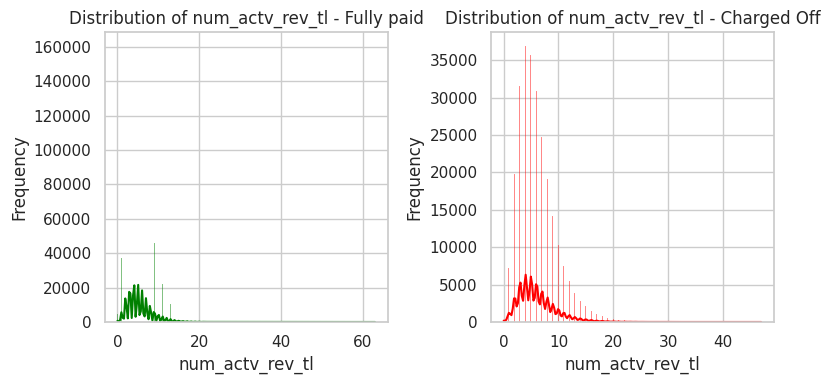

In [80]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['num_actv_rev_tl'], kde=True, color='green')
plt.title('Distribution of num_actv_rev_tl - Fully paid')
plt.xlabel('num_actv_rev_tl')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['num_actv_rev_tl'], kde=True, color='red')
plt.title('Distribution of num_actv_rev_tl - Charged Off')
plt.xlabel('num_actv_rev_tl')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

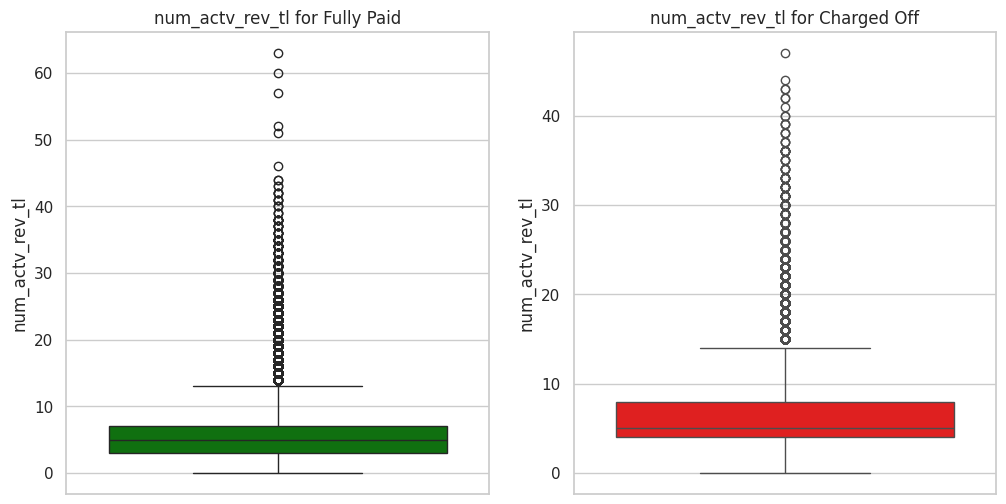

In [81]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['num_actv_rev_tl'].dropna(), color='green')
plt.title('num_actv_rev_tl for Fully Paid')
plt.ylabel('num_actv_rev_tl')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['num_actv_rev_tl'].dropna(), color='red')
plt.title('num_actv_rev_tl for Charged Off')
plt.ylabel('num_actv_rev_tl')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [82]:
num_actv_rev_tl_lower_bound, num_actv_rev_tl_upper_bound = outlier_thresholds(df, 'num_actv_rev_tl')
df[(df['num_actv_rev_tl']< num_actv_rev_tl_lower_bound) | (df['num_actv_rev_tl']> num_actv_rev_tl_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     25752
Charged Off    10216
Name: count, dtype: int64

In [83]:
len(df[(df['num_actv_rev_tl']< num_actv_rev_tl_lower_bound) | (df['num_actv_rev_tl']> num_actv_rev_tl_upper_bound)])

35968

In [84]:
print('lower outlier value:', num_actv_rev_tl_lower_bound)
print('upper outlier value:', num_actv_rev_tl_upper_bound)

lower outlier value: -3.0
upper outlier value: 13.0


In [85]:
print(len(df[df['num_actv_rev_tl']>0]))
print(len(df[df['num_actv_rev_tl']==0]))

1272316
5467


In [86]:
df['num_actv_rev_tl'].mode()

0    4.0
Name: num_actv_rev_tl, dtype: float64

In [87]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: percent_bc_gt_75**

In [88]:
len(df_fully_paid)

1076751

In [89]:
len(df_charged_off)

268559

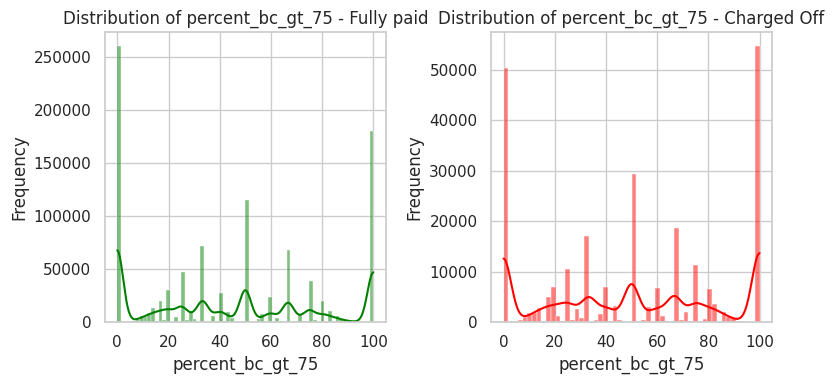

In [90]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['percent_bc_gt_75'], kde=True, color='green')
plt.title('Distribution of percent_bc_gt_75 - Fully paid')
plt.xlabel('percent_bc_gt_75')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['percent_bc_gt_75'], kde=True, color='red')
plt.title('Distribution of percent_bc_gt_75 - Charged Off')
plt.xlabel('percent_bc_gt_75')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

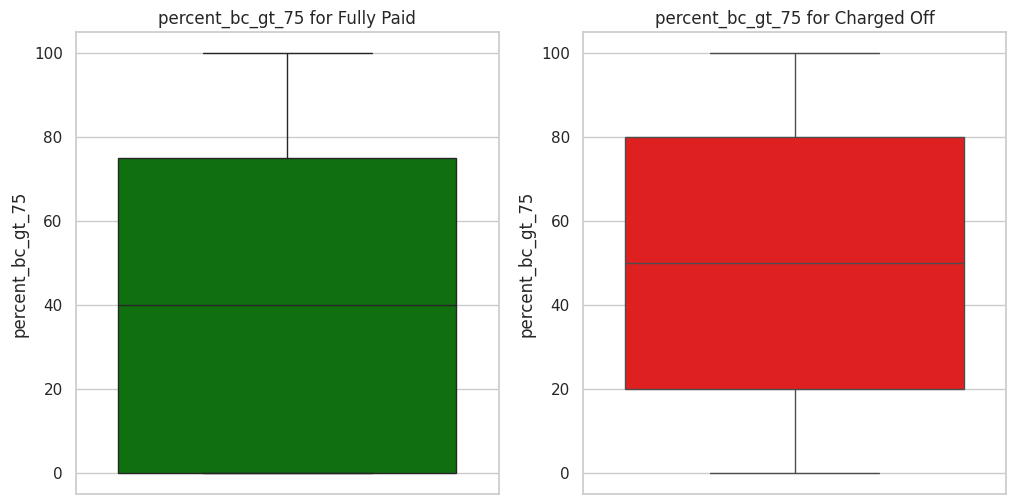

In [91]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['percent_bc_gt_75'].dropna(), color='green')
plt.title('percent_bc_gt_75 for Fully Paid')
plt.ylabel('percent_bc_gt_75')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['percent_bc_gt_75'].dropna(), color='red')
plt.title('percent_bc_gt_75 for Charged Off')
plt.ylabel('percent_bc_gt_75')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [92]:
percent_bc_gt_75_lower_bound, percent_bc_gt_75_upper_bound = outlier_thresholds(df, 'percent_bc_gt_75')
df[(df['percent_bc_gt_75']< percent_bc_gt_75_lower_bound) | (df['percent_bc_gt_75']> percent_bc_gt_75_upper_bound)]['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [93]:
len(df[(df['percent_bc_gt_75']< percent_bc_gt_75_lower_bound) | (df['percent_bc_gt_75']> percent_bc_gt_75_upper_bound)])

0

In [94]:
print('lower outlier value:', percent_bc_gt_75_lower_bound)
print('upper outlier value:', percent_bc_gt_75_upper_bound)

lower outlier value: -87.5
upper outlier value: 172.5


In [95]:
print(len(df[df['percent_bc_gt_75']>0]))
print(len(df[df['percent_bc_gt_75']==0]))

974025
309730


In [96]:
df['percent_bc_gt_75'].mode()

0    0.0
Name: percent_bc_gt_75, dtype: float64

In [97]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [98]:
print("Column values and no of times values getting repeated")
df['percent_bc_gt_75'].value_counts()

Column values and no of times values getting repeated


percent_bc_gt_75
0.00      309730
100.00    234691
50.00     143988
33.30      88734
66.70      86218
25.00      57467
75.00      49675
20.00      37335
40.00      34464
60.00      30630
80.00      26666
16.70      24039
14.30      15219
83.30      13915
28.60      13066
42.90      11429
12.50       9745
57.10       9586
71.40       8311
85.70       7081
37.50       6986
11.10       6090
22.20       5107
62.50       4814
10.00       3873
87.50       3476
44.40       3450
55.60       2933
30.00       2660
9.10        2493
77.80       2152
18.20       2001
88.90       1755
8.30        1650
27.30       1590
36.40       1284
70.00       1184
45.50       1072
7.70        1059
90.00        962
54.50        894
15.40        829
63.60        794
72.70        680
41.70        654
7.10         634
81.80        622
23.10        612
30.80        567
90.90        500
6.70         454
38.50        446
21.40        442
58.30        441
13.30        348
46.20        344
91.70        261
61.50        2

**Column: tot_hi_cred_lim**

In [99]:
len(df_fully_paid)

1076751

In [100]:
len(df_charged_off)

268559

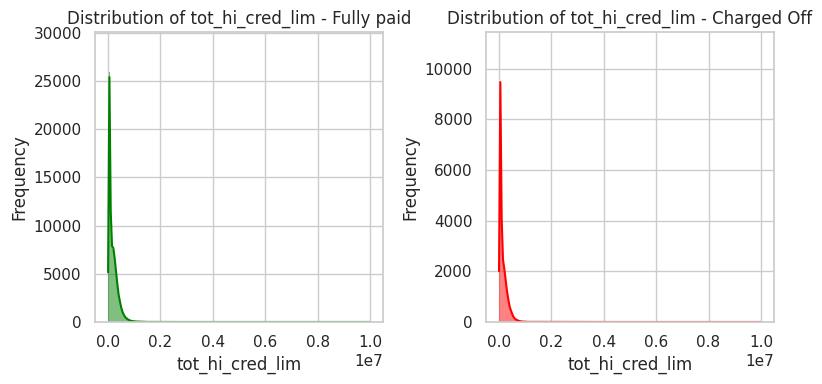

In [101]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['tot_hi_cred_lim'], kde=True, color='green')
plt.title('Distribution of tot_hi_cred_lim - Fully paid')
plt.xlabel('tot_hi_cred_lim')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['tot_hi_cred_lim'], kde=True, color='red')
plt.title('Distribution of tot_hi_cred_lim - Charged Off')
plt.xlabel('tot_hi_cred_lim')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

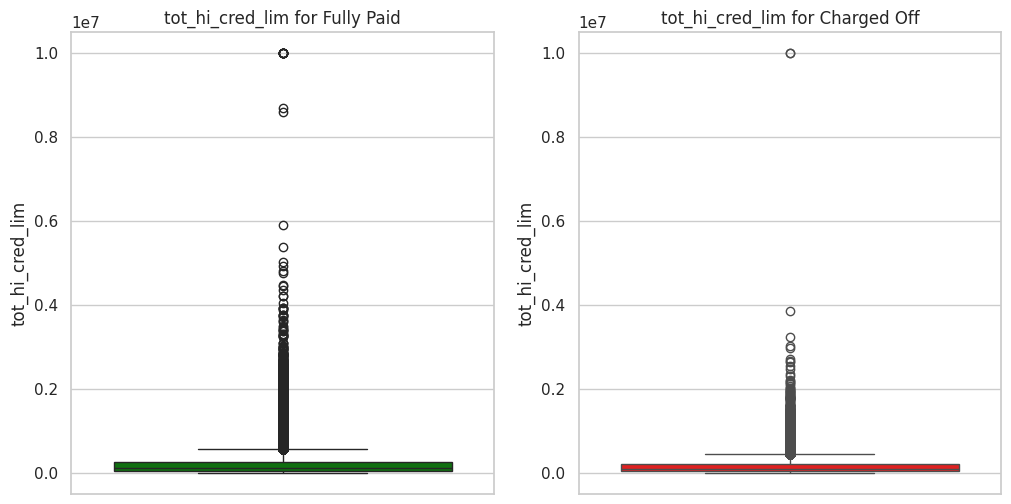

In [102]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['tot_hi_cred_lim'].dropna(), color='green')
plt.title('tot_hi_cred_lim for Fully Paid')
plt.ylabel('tot_hi_cred_lim')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['tot_hi_cred_lim'].dropna(), color='red')
plt.title('tot_hi_cred_lim for Charged Off')
plt.ylabel('tot_hi_cred_lim')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [103]:
tot_hi_cred_lim_lower_bound, tot_hi_cred_lim_upper_bound = outlier_thresholds(df, 'tot_hi_cred_lim')
df[(df['tot_hi_cred_lim']< tot_hi_cred_lim_lower_bound) | (df['tot_hi_cred_lim']> tot_hi_cred_lim_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     38503
Charged Off     5267
Name: count, dtype: int64

In [104]:
len(df[(df['tot_hi_cred_lim']< tot_hi_cred_lim_lower_bound) | (df['tot_hi_cred_lim']> tot_hi_cred_lim_upper_bound)])

43770

In [105]:
print('lower outlier value:', tot_hi_cred_lim_lower_bound)
print('upper outlier value:', tot_hi_cred_lim_upper_bound)

lower outlier value: -254062.75
upper outlier value: 555759.25


In [106]:
print(len(df[df['tot_hi_cred_lim']>0]))
print(len(df[df['tot_hi_cred_lim']==0]))

1277761
22


In [107]:
df['tot_hi_cred_lim'].mode()

0    12500.0
1    15500.0
Name: tot_hi_cred_lim, dtype: float64

In [108]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [109]:
43770/len(df)

0.03253525209802945

**Column: total_bal_ex_mort**

In [110]:
len(df_fully_paid)

1076751

In [111]:
len(df_charged_off)

268559

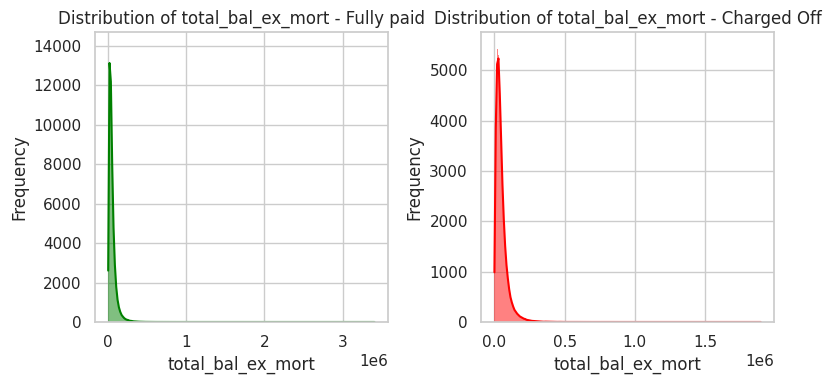

In [112]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_bal_ex_mort'], kde=True, color='green')
plt.title('Distribution of total_bal_ex_mort - Fully paid')
plt.xlabel('total_bal_ex_mort')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_bal_ex_mort'], kde=True, color='red')
plt.title('Distribution of total_bal_ex_mort - Charged Off')
plt.xlabel('total_bal_ex_mort')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

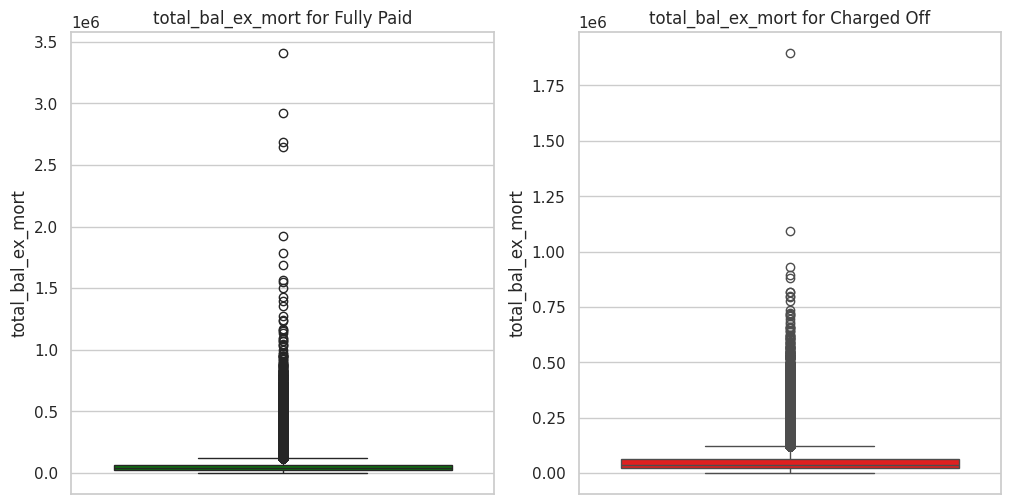

In [113]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_bal_ex_mort'].dropna(), color='green')
plt.title('total_bal_ex_mort for Fully Paid')
plt.ylabel('total_bal_ex_mort')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_bal_ex_mort'].dropna(), color='red')
plt.title('total_bal_ex_mort for Charged Off')
plt.ylabel('total_bal_ex_mort')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [114]:
total_bal_ex_mort_lower_bound, total_bal_ex_mort_upper_bound = outlier_thresholds(df, 'total_bal_ex_mort')
df[(df['total_bal_ex_mort']< total_bal_ex_mort_lower_bound) | (df['total_bal_ex_mort']> total_bal_ex_mort_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     61478
Charged Off    14338
Name: count, dtype: int64

In [115]:
len(df[(df['total_bal_ex_mort']< total_bal_ex_mort_lower_bound) | (df['total_bal_ex_mort']> total_bal_ex_mort_upper_bound)])

75816

In [116]:
print('lower outlier value:', total_bal_ex_mort_lower_bound)
print('upper outlier value:', total_bal_ex_mort_upper_bound)

lower outlier value: -41607.0
upper outlier value: 125041.0


In [117]:
print(len(df[df['total_bal_ex_mort']>0]))
print(len(df[df['total_bal_ex_mort']==0]))

1297354
675


In [118]:
df['total_bal_ex_mort'].mode()

0    0.0
Name: total_bal_ex_mort, dtype: float64

In [119]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [120]:
43770/len(df)

0.03253525209802945

In [121]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_bal_ex_mort'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,0.00,NaN
1,5.0,6848.00,6848.00
2,10.0,10886.00,4038.00
3,15.0,14403.00,3517.00
4,20.0,17714.00,3311.00
5,25.0,20886.00,3172.00
6,30.0,23992.00,3106.00
7,35.0,27127.00,3135.00
8,40.0,30349.00,3222.00
9,45.0,33721.00,3372.00


**Column: total_bal_ex_mort**

In [122]:
len(df_fully_paid)

1076751

In [123]:
len(df_charged_off)

268559

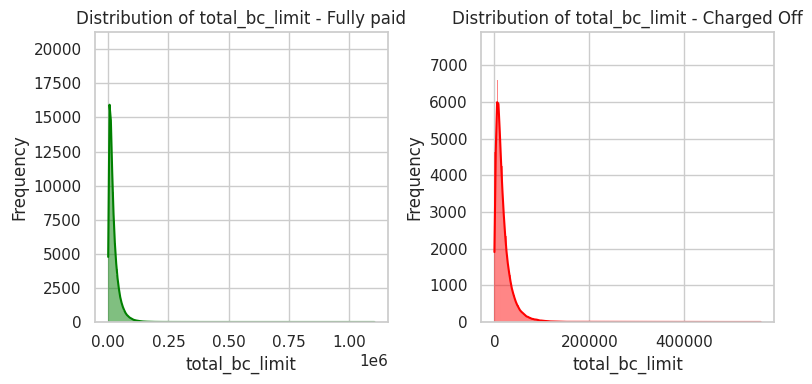

In [124]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_bc_limit'], kde=True, color='green')
plt.title('Distribution of total_bc_limit - Fully paid')
plt.xlabel('total_bc_limit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_bc_limit'], kde=True, color='red')
plt.title('Distribution of total_bc_limit - Charged Off')
plt.xlabel('total_bc_limit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

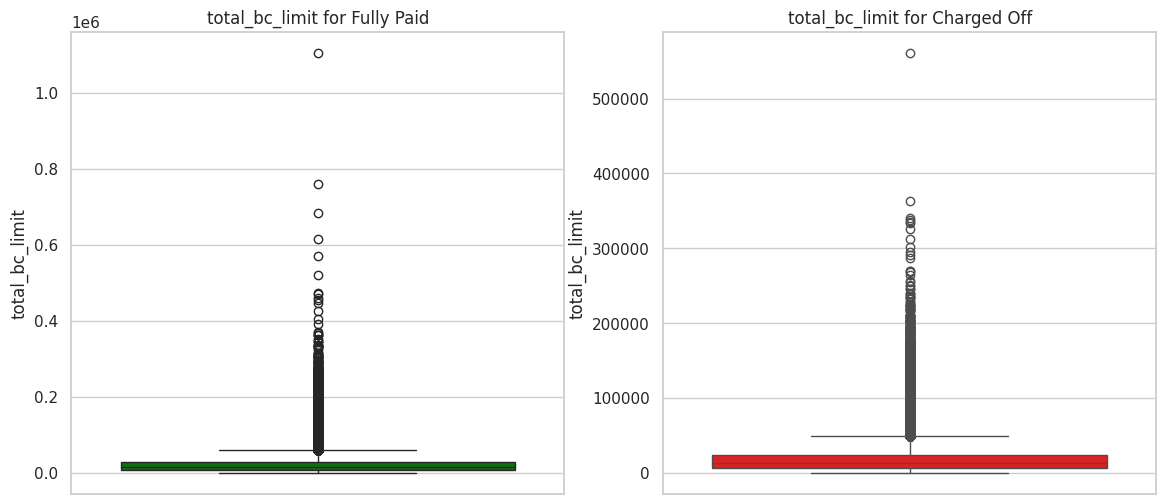

In [125]:
# Plotting Box Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_bc_limit'].dropna(), color='green')
plt.title('total_bc_limit for Fully Paid')
plt.ylabel('total_bc_limit')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_bc_limit'].dropna(), color='red')
plt.title('total_bc_limit for Charged Off')
plt.ylabel('total_bc_limit')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [126]:
total_bc_limit_lower_bound, total_bc_limit_upper_bound = outlier_thresholds(df, 'total_bc_limit')
df[(df['total_bc_limit']< total_bc_limit_lower_bound) | (df['total_bc_limit']> total_bc_limit_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     68683
Charged Off    10127
Name: count, dtype: int64

In [127]:
len(df[(df['total_bc_limit']< total_bc_limit_lower_bound) | (df['total_bc_limit']> total_bc_limit_upper_bound)])

78810

In [128]:
print('lower outlier value:', total_bc_limit_lower_bound)
print('upper outlier value:', total_bc_limit_upper_bound)

lower outlier value: -22650.0
upper outlier value: 58550.0


In [129]:
print(len(df[df['total_bc_limit']>0]))
print(len(df[df['total_bc_limit']==0]))

1283755
14274


In [130]:
df['total_bc_limit'].mode()

0    0.0
Name: total_bc_limit, dtype: float64

In [131]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [132]:
43770/len(df)

0.03253525209802945

In [133]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_bc_limit'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,0.0,NaN
1,5.0,2300.0,2300.0
2,10.0,3900.0,1600.0
3,15.0,5200.0,1300.0
4,20.0,6500.0,1300.0
5,25.0,7800.0,1300.0
6,30.0,9000.0,1200.0
7,35.0,10400.0,1400.0
8,40.0,11800.0,1400.0
9,45.0,13400.0,1600.0


**Column: total_il_high_credit_limit**

In [134]:
len(df_fully_paid)

1076751

In [135]:
len(df_charged_off)

268559

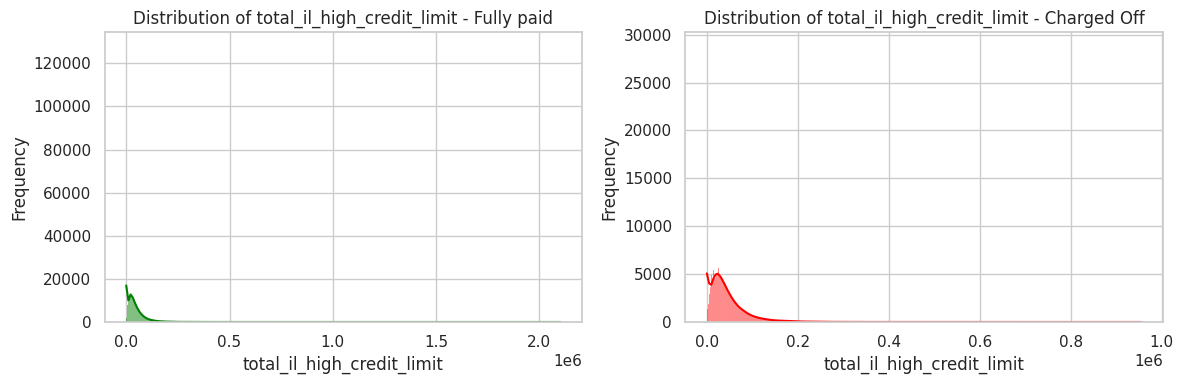

In [136]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_il_high_credit_limit'], kde=True, color='green')
plt.title('Distribution of total_il_high_credit_limit - Fully paid')
plt.xlabel('total_il_high_credit_limit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_il_high_credit_limit'], kde=True, color='red')
plt.title('Distribution of total_il_high_credit_limit - Charged Off')
plt.xlabel('total_il_high_credit_limit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

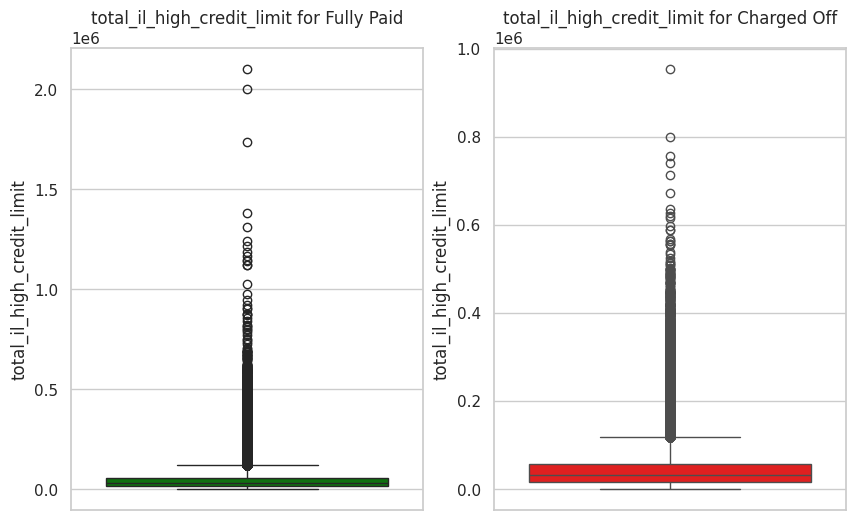

In [137]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_il_high_credit_limit'].dropna(), color='green')
plt.title('total_il_high_credit_limit for Fully Paid')
plt.ylabel('total_il_high_credit_limit')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_il_high_credit_limit'].dropna(), color='red')
plt.title('total_il_high_credit_limit for Charged Off')
plt.ylabel('total_il_high_credit_limit')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [138]:
total_il_high_credit_limit_lower_bound, total_il_high_credit_limit_upper_bound = outlier_thresholds(df, 'total_il_high_credit_limit')
df[(df['total_il_high_credit_limit']< total_il_high_credit_limit_lower_bound) | (df['total_il_high_credit_limit']> total_il_high_credit_limit_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     52243
Charged Off    12541
Name: count, dtype: int64

In [139]:
len(df[(df['total_il_high_credit_limit']< total_il_high_credit_limit_lower_bound) | (df['total_il_high_credit_limit']> total_il_high_credit_limit_upper_bound)])

64784

In [140]:
print('lower outlier value:', total_il_high_credit_limit_lower_bound)
print('upper outlier value:', total_il_high_credit_limit_upper_bound)

lower outlier value: -48107.5
upper outlier value: 119480.5


In [141]:
print(len(df[df['total_il_high_credit_limit']>0]))
print(len(df[df['total_il_high_credit_limit']==0]))

1121794
155989


In [142]:
df['total_il_high_credit_limit'].mode()

0    0.0
Name: total_il_high_credit_limit, dtype: float64

In [143]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [144]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_il_high_credit_limit'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,0.00,NaN
1,5.0,0.00,0.00
2,10.0,0.00,0.00
3,15.0,6000.00,6000.00
4,20.0,10530.00,4530.00
5,25.0,14738.00,4208.00
6,30.0,18093.00,3355.00
7,35.0,21424.00,3331.00
8,40.0,24808.00,3384.00
9,45.0,28112.00,3304.00


**Column: emp_title**

In [145]:
print('Top 20 job titles of customers where loans were charged off')
df_charged_off['emp_title'].value_counts().head(20)

Top 20 job titles of customers where loans were charged off


emp_title
Manager               4090
Teacher               3950
Owner                 2696
Driver                2116
Supervisor            1812
Sales                 1701
Registered Nurse      1673
RN                    1613
manager               1183
owner                 1182
General Manager       1135
Office Manager        1054
Project Manager       1034
driver                 999
President              812
teacher                768
Director               766
Truck Driver           730
Engineer               662
Operations Manager     639
Name: count, dtype: int64

In [146]:
print('Top 20 job titles of customers where loans were fully paid')
df_fully_paid['emp_title'].value_counts().head(20)

Top 20 job titles of customers where loans were fully paid


emp_title
Teacher               17318
Manager               15380
Owner                  7606
Registered Nurse       7101
RN                     6909
Supervisor             6477
Sales                  5786
Driver                 5442
Project Manager        5347
Office Manager         4472
Director               4266
General Manager        4056
Engineer               3632
owner                  3403
President              3350
manager                3328
teacher                3326
Vice President         3079
Operations Manager     2818
Accountant             2750
Name: count, dtype: int64

**Column: emp_length**

In [147]:
print('Employement lengths of customers where loans were charged off')
df_charged_off['emp_length'].value_counts()

Employement lengths of customers where loans were charged off


emp_length
10+ years    83057
2 years      24114
< 1 year     22182
3 years      21486
1 year       18198
5 years      16495
4 years      15900
6 years      12140
8 years      12100
7 years      11620
9 years      10137
Name: count, dtype: int64

In [148]:
print('Employement lengths of customers where loans were fully paid')
100*df_fully_paid['emp_length'].value_counts().head(20)/len(df_fully_paid)

Employement lengths of customers where loans were fully paid


emp_length
10+ years    33.354230
2 years       9.066999
3 years       7.997299
< 1 year      7.975753
1 year        6.528529
5 years       6.283625
4 years       6.004731
6 years       4.698672
8 years       4.513671
7 years       4.458227
9 years       3.789177
Name: count, dtype: float64

**Column: title**

In [149]:
print('% Title of customers where loans were charged off')
(100*df_charged_off['title'].value_counts()/len(df_charged_off)).head(20)

% Title of customers where loans were charged off


title
Debt consolidation           53.679452
Credit card refinancing      16.283573
Other                         5.352269
Home improvement              5.130716
Major purchase                1.793274
Business                      1.345701
Medical expenses              1.131967
Debt Consolidation            0.865732
Moving and relocation         0.726097
Car financing                 0.658328
Vacation                      0.579016
Home buying                   0.507896
debt consolidation            0.360815
Consolidation                 0.274800
Debt Consolidation Loan       0.210010
consolidation                 0.139634
Personal Loan                 0.110963
Home Improvement              0.091600
Credit Card Consolidation     0.087876
Consolidation Loan            0.086759
Name: count, dtype: float64

In [150]:
print('% Title of customers where loans were fully paid')
(100*df_fully_paid['title'].value_counts()/len(df_fully_paid)).head(20)

% Title of customers where loans were fully paid


title
Debt consolidation           47.996148
Credit card refinancing      19.148252
Home improvement              5.692495
Other                         4.866863
Major purchase                1.785835
Debt Consolidation            1.241698
Medical expenses              0.978499
Car financing                 0.877826
Business                      0.755606
Vacation                      0.602832
Moving and relocation         0.556675
Consolidation                 0.428697
Home buying                   0.420896
debt consolidation            0.356907
Debt Consolidation Loan       0.298398
Credit Card Consolidation     0.196053
consolidation                 0.166055
Personal Loan                 0.166055
Consolidation Loan            0.142744
Home Improvement              0.140330
Name: count, dtype: float64

**Column: title**

In [151]:
print('% zip_code of customers where loans were charged off')
(100*df_charged_off['zip_code'].value_counts()/len(df_charged_off)).head(20)

% zip_code of customers where loans were charged off


zip_code
112xx    1.150213
945xx    1.023239
331xx    0.997919
750xx    0.967013
891xx    0.934990
104xx    0.925681
330xx    0.854933
070xx    0.836688
770xx    0.803548
900xx    0.793494
606xx    0.776366
300xx    0.763333
917xx    0.748439
117xx    0.746205
100xx    0.696309
921xx    0.642689
852xx    0.613273
926xx    0.596889
925xx    0.596517
334xx    0.581995
Name: count, dtype: float64

In [152]:
print('% zip_code of customers where loans were fully paid')
(100*df_fully_paid['zip_code'].value_counts()/len(df_fully_paid)).head(20)

% zip_code of customers where loans were fully paid


zip_code
945xx    1.138332
750xx    1.103041
112xx    0.997445
606xx    0.961039
300xx    0.935592
100xx    0.811330
331xx    0.802878
070xx    0.790341
900xx    0.783282
770xx    0.774645
891xx    0.753563
330xx    0.707592
917xx    0.706663
117xx    0.669050
852xx    0.648618
104xx    0.645089
921xx    0.611191
925xx    0.593823
926xx    0.589366
913xx    0.588715
Name: count, dtype: float64

**Column: last_pymnt_d**

In [153]:
print('% last_pymnt_d of customers where loans were charged off')
(100*df_charged_off['last_pymnt_d'].value_counts()/len(df_charged_off)).head(20)

% last_pymnt_d of customers where loans were charged off


last_pymnt_d
Aug-2018    2.749861
Aug-2017    2.681347
Oct-2018    2.675017
Mar-2017    2.599801
Jul-2018    2.577087
Jun-2018    2.524585
Oct-2017    2.524585
Jan-2018    2.510435
Mar-2018    2.500754
Jun-2017    2.494796
Jul-2017    2.430751
Sep-2017    2.398356
Nov-2017    2.377876
Sep-2018    2.346226
May-2018    2.339151
Sep-2016    2.330587
May-2017    2.327608
Oct-2016    2.263562
Jan-2017    2.231167
Apr-2018    2.204730
Name: count, dtype: float64

In [154]:
print('% last_pymnt_d of customers where loans were fully paid')
(100*df_fully_paid['last_pymnt_d'].value_counts()/len(df_fully_paid)).head(20)

% last_pymnt_d of customers where loans were fully paid


last_pymnt_d
Feb-2019    3.123006
Aug-2018    2.993264
Mar-2018    2.930390
Jan-2019    2.794889
Oct-2018    2.779566
Jul-2018    2.746503
Nov-2018    2.639515
Jun-2018    2.636450
May-2018    2.523703
Jan-2018    2.454049
Dec-2018    2.453213
Feb-2018    2.409471
Apr-2018    2.405849
Mar-2017    2.397304
Oct-2017    2.354583
Sep-2018    2.325514
Nov-2017    2.318828
Aug-2017    2.307962
Jul-2017    2.202552
Jun-2017    2.141349
Name: count, dtype: float64

**Column: last_credit_pull_d**

In [155]:
print('% last_credit_pull_d of customers where loans were charged off')
(100*df_charged_off['last_credit_pull_d'].value_counts()/len(df_charged_off)).head(20)

% last_credit_pull_d of customers where loans were charged off


last_credit_pull_d
Mar-2019    24.473579
Oct-2016    14.444871
Feb-2017     6.369178
Jul-2018     5.846388
Aug-2018     4.712931
Feb-2019     3.982365
Oct-2018     3.306164
Oct-2017     2.879442
Jun-2017     2.309362
Jan-2019     2.151855
Dec-2018     1.959346
Nov-2018     1.947431
Jan-2018     1.800349
Feb-2018     1.783966
Nov-2017     1.776518
Jul-2017     1.713218
Sep-2018     1.683801
Apr-2018     1.677844
Dec-2017     1.614170
Mar-2018     1.606351
Name: count, dtype: float64

In [156]:
print('% last_credit_pull_d of customers where loans were fully paid')
(100*df_fully_paid['last_credit_pull_d'].value_counts()/len(df_fully_paid)).head(20)

% last_credit_pull_d of customers where loans were fully paid


last_credit_pull_d
Mar-2019    37.622533
Feb-2019     5.958202
Jan-2019     5.158110
Dec-2018     3.605662
Jul-2018     3.514462
Oct-2018     3.483814
Nov-2018     3.468026
Aug-2018     2.824516
Sep-2018     2.613046
May-2018     1.938238
Apr-2018     1.807289
Mar-2018     1.788714
Jan-2018     1.544740
Feb-2018     1.509634
Nov-2017     1.271975
Oct-2017     1.261852
Dec-2017     1.150870
Aug-2017     1.136660
Sep-2017     1.131738
Oct-2016     1.101462
Name: count, dtype: float64

# **3.2 Analysing complete columns with no null values**

**Based on data in the 'statistics_columns_with_missing_values.xls' workbook and the data quality report, conducting univariate and bivariate analysis on each column to impute the missing values**

**column: loan_amnt**

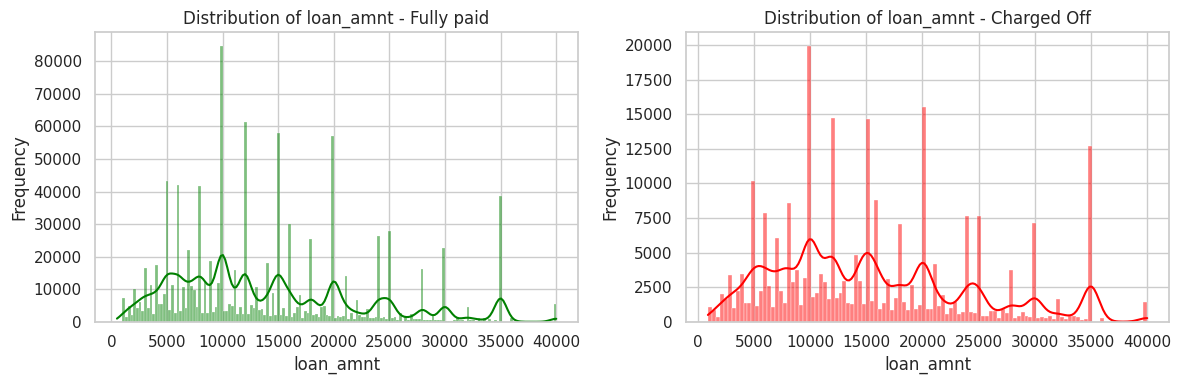

In [157]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['loan_amnt'], kde=True, color='green')
plt.title('Distribution of loan_amnt - Fully paid')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['loan_amnt'], kde=True, color='red')
plt.title('Distribution of loan_amnt - Charged Off')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

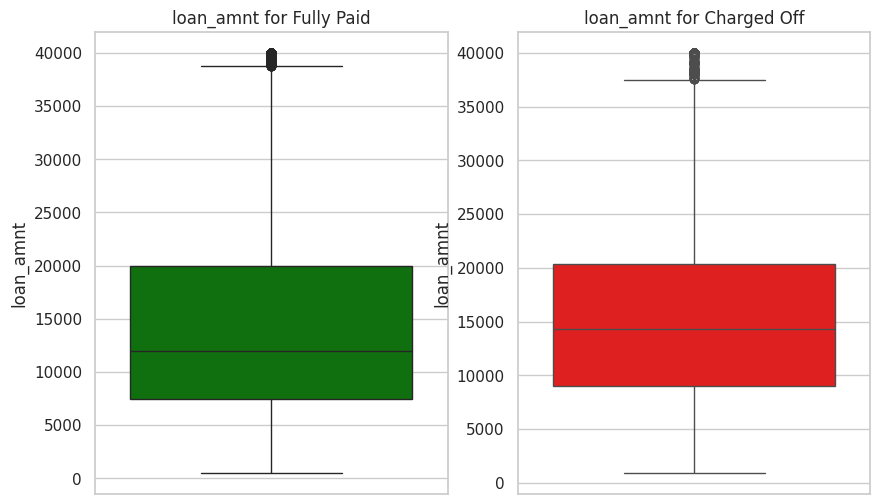

In [158]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['loan_amnt'].dropna(), color='green')
plt.title('loan_amnt for Fully Paid')
plt.ylabel('loan_amnt')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['loan_amnt'].dropna(), color='red')
plt.title('loan_amnt for Charged Off')
plt.ylabel('loan_amnt')

plt.show()  # Show all plots

In [159]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['loan_amnt'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,500.0,NaN
1,5.0,3200.0,2700.0
2,10.0,5000.0,1800.0
3,15.0,5650.0,650.0
4,20.0,6500.0,850.0
5,25.0,8000.0,1500.0
6,30.0,8700.0,700.0
7,35.0,10000.0,1300.0
8,40.0,10000.0,0.0
9,45.0,11575.0,1575.0


**column: funded_amnt**

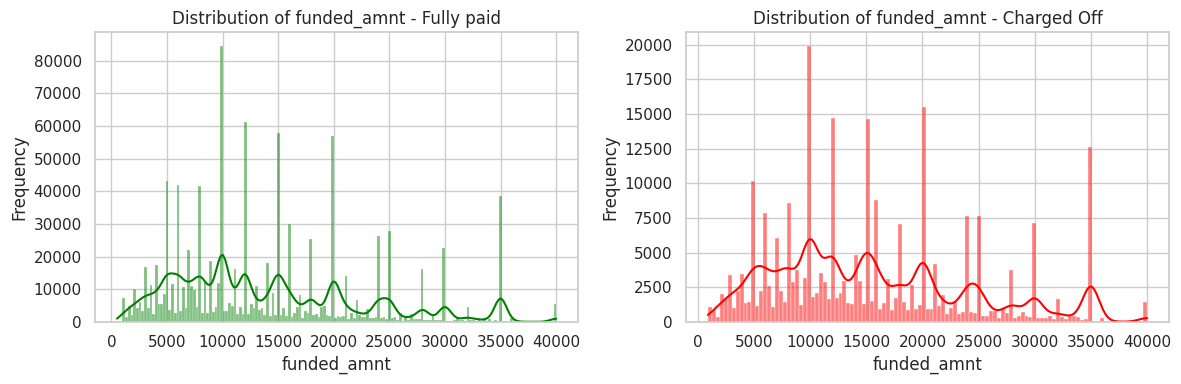

In [160]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['funded_amnt'], kde=True, color='green')
plt.title('Distribution of funded_amnt - Fully paid')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['funded_amnt'], kde=True, color='red')
plt.title('Distribution of funded_amnt - Charged Off')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

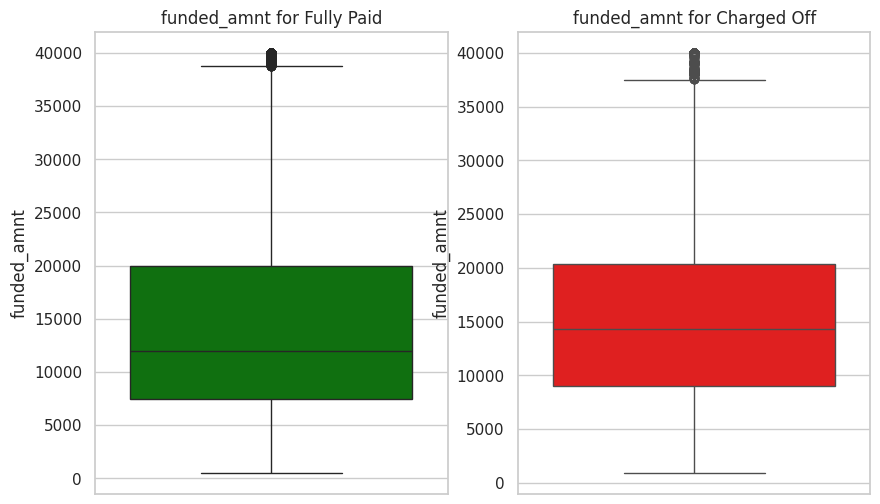

In [161]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['funded_amnt'].dropna(), color='green')
plt.title('funded_amnt for Fully Paid')
plt.ylabel('funded_amnt')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['funded_amnt'].dropna(), color='red')
plt.title('funded_amnt for Charged Off')
plt.ylabel('funded_amnt')

plt.show()  # Show all plots

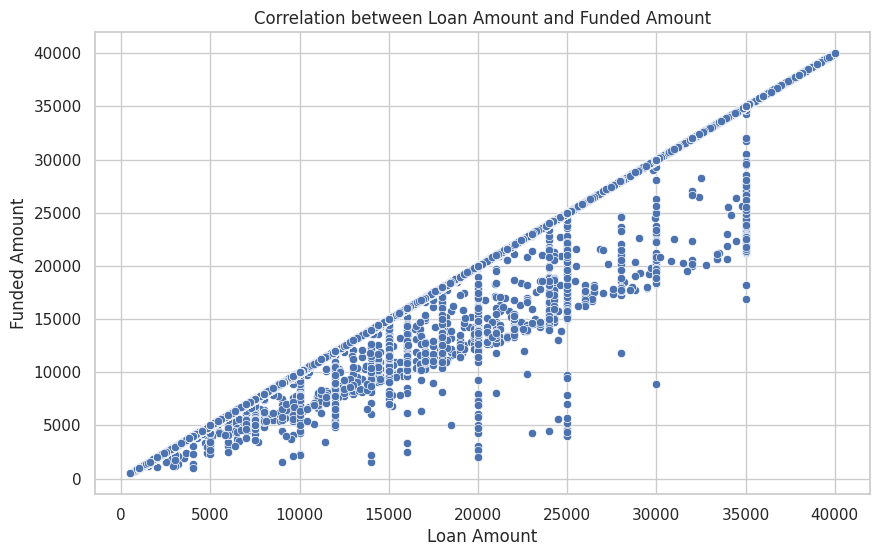

In [162]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')

plt.show()

**column: funded_amnt_inv**

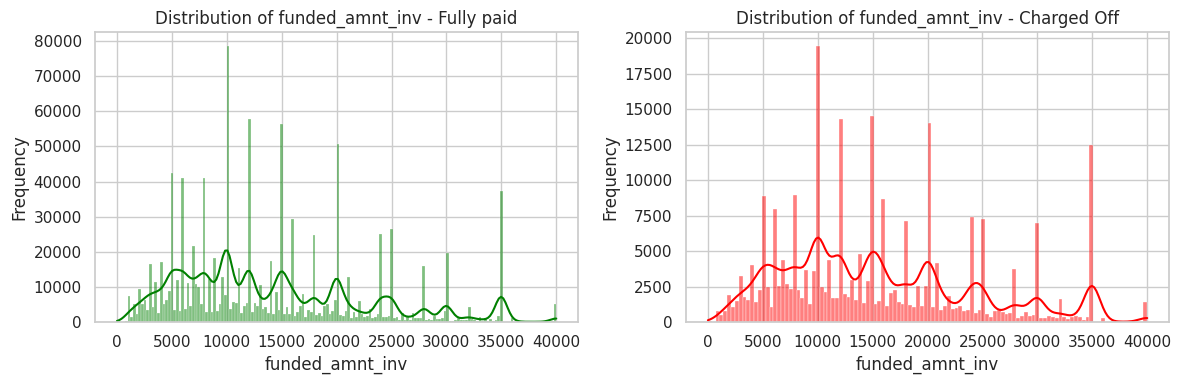

In [163]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['funded_amnt_inv'], kde=True, color='green')
plt.title('Distribution of funded_amnt_inv - Fully paid')
plt.xlabel('funded_amnt_inv')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['funded_amnt_inv'], kde=True, color='red')
plt.title('Distribution of funded_amnt_inv - Charged Off')
plt.xlabel('funded_amnt_inv')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

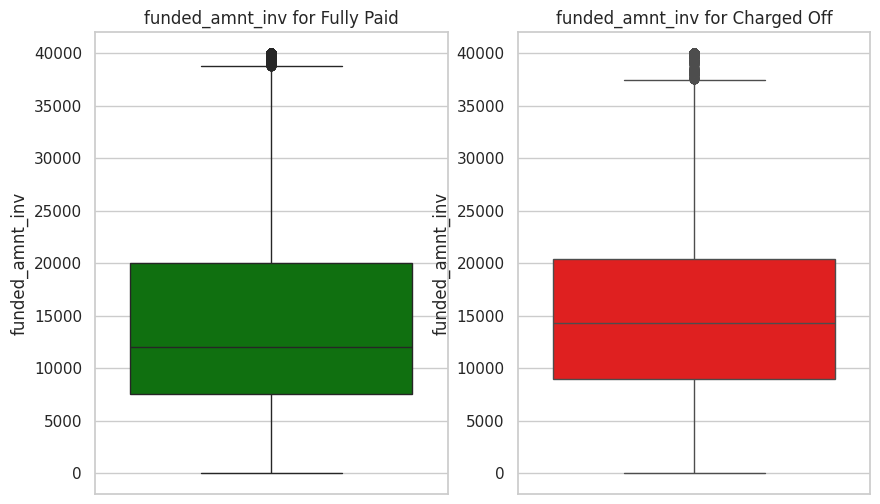

In [164]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['funded_amnt_inv'].dropna(), color='green')
plt.title('funded_amnt_inv for Fully Paid')
plt.ylabel('funded_amnt_inv')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['funded_amnt_inv'].dropna(), color='red')
plt.title('funded_amnt_inv for Charged Off')
plt.ylabel('funded_amnt_inv')

plt.show()  # Show all plots

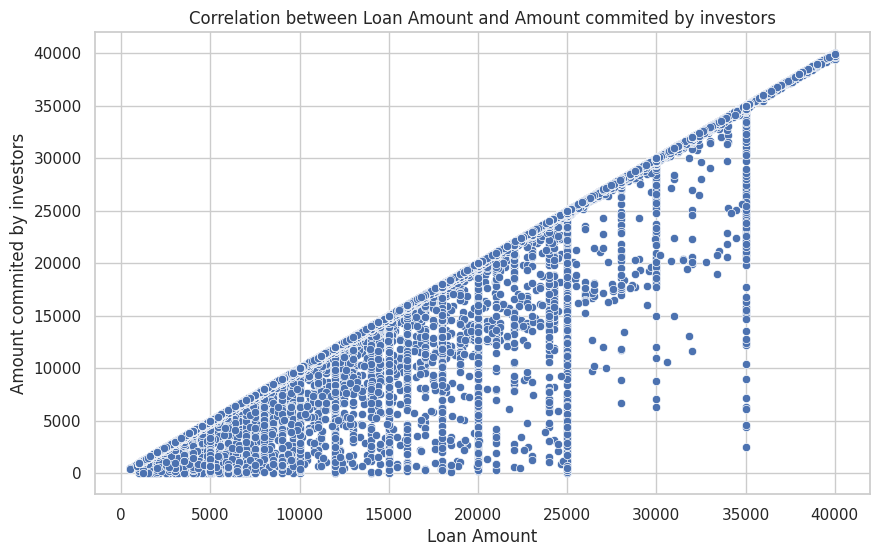

In [165]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='funded_amnt_inv', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and Amount commited by investors')
plt.xlabel('Loan Amount')
plt.ylabel('Amount commited by investors')

plt.show()

In [166]:
# Create the diff_flag column
df['diff_flag'] = np.where(df['loan_amnt'] > df['funded_amnt_inv'], 'Y', 'N')
print('Distribution of diff_flag where loan_status is Fully Paid', df[df['loan_status']=='Fully Paid']['diff_flag'].value_counts())
print('Distribution of diff_flag where loan_status is Charged Off', df[df['loan_status']=='Charged Off']['diff_flag'].value_counts())

Distribution of diff_flag where loan_status is Fully Paid diff_flag
N    986128
Y     90623
Name: count, dtype: int64
Distribution of diff_flag where loan_status is Charged Off diff_flag
N    244566
Y     23993
Name: count, dtype: int64


The diff_flag ratio of N:Y for both Fully paid and Charged Off loan_status is 10:1. So, there;s no significant trend of diff_flag wrt loan_status. Hence, we can drop the column created

In [167]:
df.drop('diff_flag', axis=1, inplace=True)

**column: term**

In [168]:
df['term'].value_counts()

term
 36 months    1020743
 60 months     324567
Name: count, dtype: int64

In [169]:
print('Distribution of loan_status w.r.t loan term')
df[['term', 'loan_status']].value_counts()

Distribution of loan_status w.r.t loan term


term        loan_status
 36 months  Fully Paid     857491
 60 months  Fully Paid     219260
 36 months  Charged Off    163252
 60 months  Charged Off    105307
Name: count, dtype: int64

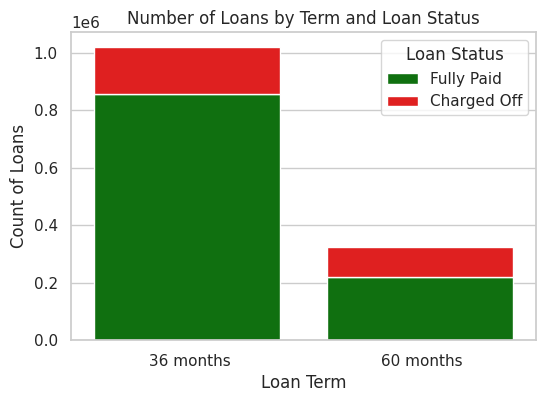

In [170]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of statuses across loan terms
ctab = pd.crosstab(df['term'], df['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='term', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='term', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by Term and Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')

plt.show()

**column: int_rate**

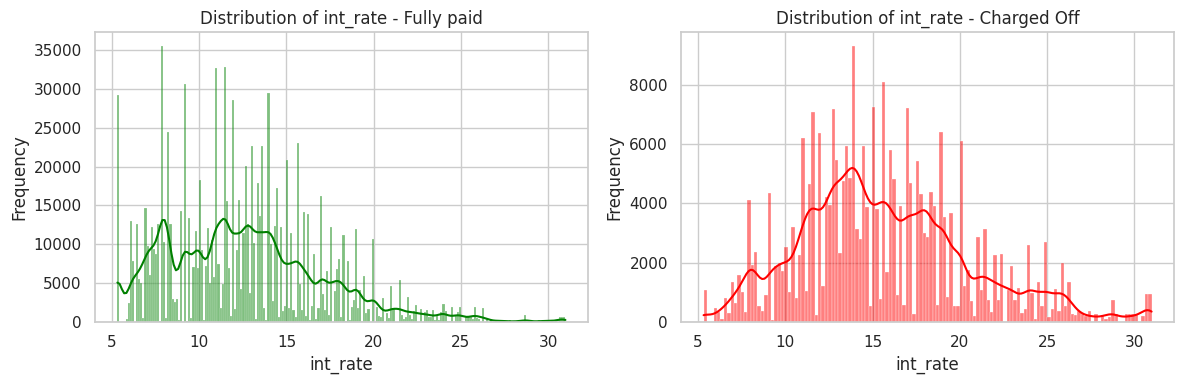

In [171]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['int_rate'], kde=True, color='green')
plt.title('Distribution of int_rate - Fully paid')
plt.xlabel('int_rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['int_rate'], kde=True, color='red')
plt.title('Distribution of int_rate - Charged Off')
plt.xlabel('int_rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

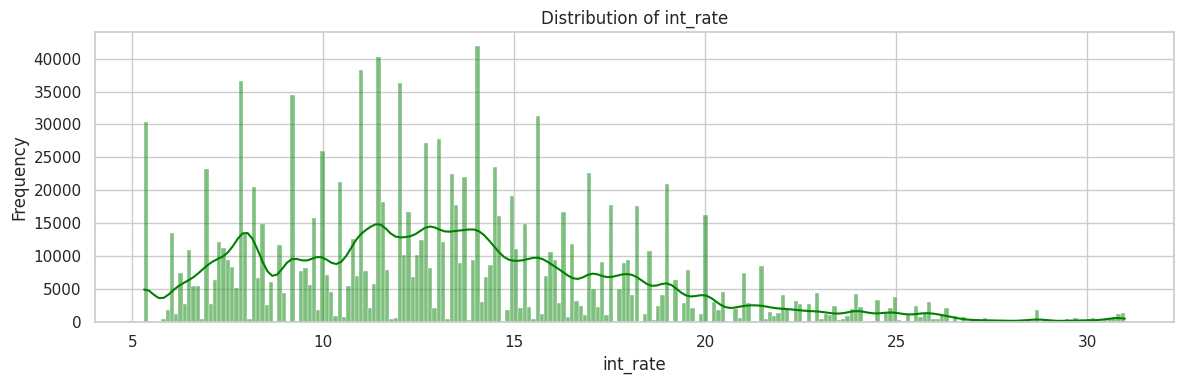

In [172]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['int_rate'], kde=True, color='green')
plt.title('Distribution of int_rate')
plt.xlabel('int_rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

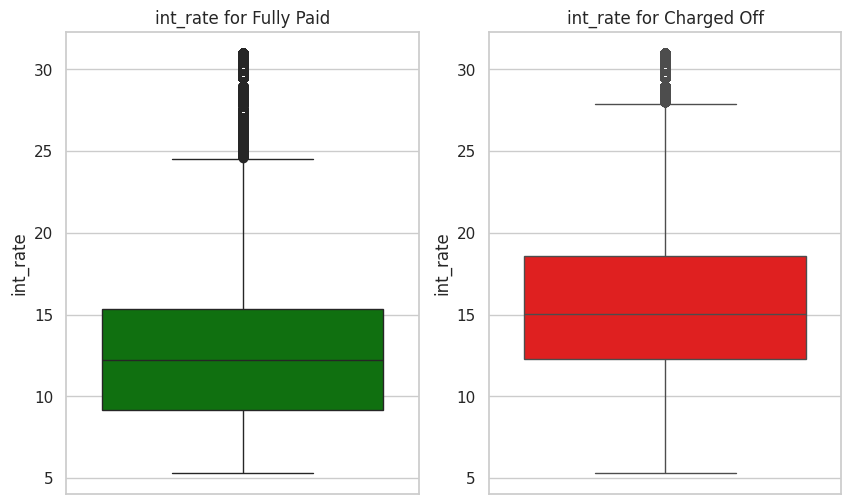

In [173]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['int_rate'].dropna(), color='green')
plt.title('int_rate for Fully Paid')
plt.ylabel('int_rate')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['int_rate'].dropna(), color='red')
plt.title('int_rate for Charged Off')
plt.ylabel('int_rate')

plt.show()  # Show all plots

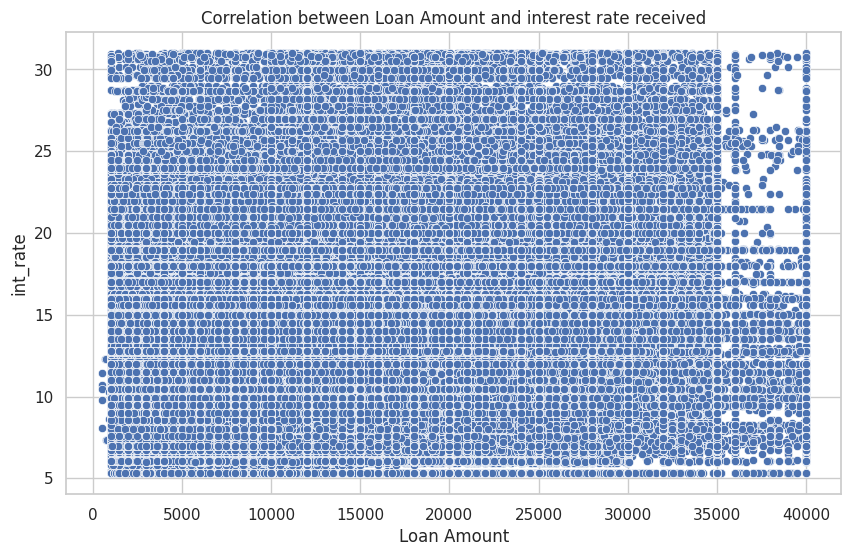

In [174]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and interest rate received')
plt.xlabel('Loan Amount')
plt.ylabel('int_rate')

plt.show()

In [175]:
df[df['int_rate']>=25]['purpose'].value_counts()

purpose
debt_consolidation    16897
other                  2526
credit_card            2369
home_improvement       1651
small_business          824
major_purchase          620
house                   478
medical                 337
moving                  294
car                     184
vacation                110
renewable_energy         29
wedding                  12
Name: count, dtype: int64

In [176]:
100* df[df['int_rate']<=5]['loan_status'].value_counts()/ len(df[df['int_rate']<=5])

Series([], Name: count, dtype: float64)

In [177]:
print(100* df[(df['int_rate']>5) & (df['int_rate']<=10)]['loan_status'].value_counts()/ len(df[(df['int_rate']>5) & (df['int_rate']<=10)]))
print(df[(df['int_rate']>5) & (df['int_rate']<=10)]['loan_status'].value_counts())

loan_status
Fully Paid     91.836403
Charged Off     8.163597
Name: count, dtype: float64
loan_status
Fully Paid     344876
Charged Off     30657
Name: count, dtype: int64


In [178]:
print(100* df[(df['int_rate']>10) & (df['int_rate']<=15)]['loan_status'].value_counts()/ len(df[(df['int_rate']>10) & (df['int_rate']<=15)]))
print(df[(df['int_rate']>10) & (df['int_rate']<=15)]['loan_status'].value_counts())

loan_status
Fully Paid     81.412771
Charged Off    18.587229
Name: count, dtype: float64
loan_status
Fully Paid     450995
Charged Off    102966
Name: count, dtype: int64


In [179]:
print(100* df[(df['int_rate']>15) & (df['int_rate']<=20)]['loan_status'].value_counts()/ len(df[(df['int_rate']>15) & (df['int_rate']<=20)]))
print(print(df[(df['int_rate']>15) & (df['int_rate']<=20)]['loan_status'].value_counts()))

loan_status
Fully Paid     70.443678
Charged Off    29.556322
Name: count, dtype: float64
loan_status
Fully Paid     217454
Charged Off     91238
Name: count, dtype: int64
None


In [180]:
print(100* df[(df['int_rate']>20) & (df['int_rate']<=25)]['loan_status'].value_counts()/ len(df[(df['int_rate']>20) & (df['int_rate']<=25)]))
print(print(df[(df['int_rate']>20) & (df['int_rate']<=25)]['loan_status'].value_counts()))

loan_status
Fully Paid     61.492951
Charged Off    38.507049
Name: count, dtype: float64
loan_status
Fully Paid     49682
Charged Off    31111
Name: count, dtype: int64
None


In [181]:
print(100* df[df['int_rate']>=25]['loan_status'].value_counts()/ len(100* df[df['int_rate']>=25]))
print(print(df[df['int_rate']>25]['loan_status'].value_counts()))

loan_status
Fully Paid     52.19703
Charged Off    47.80297
Name: count, dtype: float64
loan_status
Fully Paid     13744
Charged Off    12587
Name: count, dtype: int64
None


**column: installment**

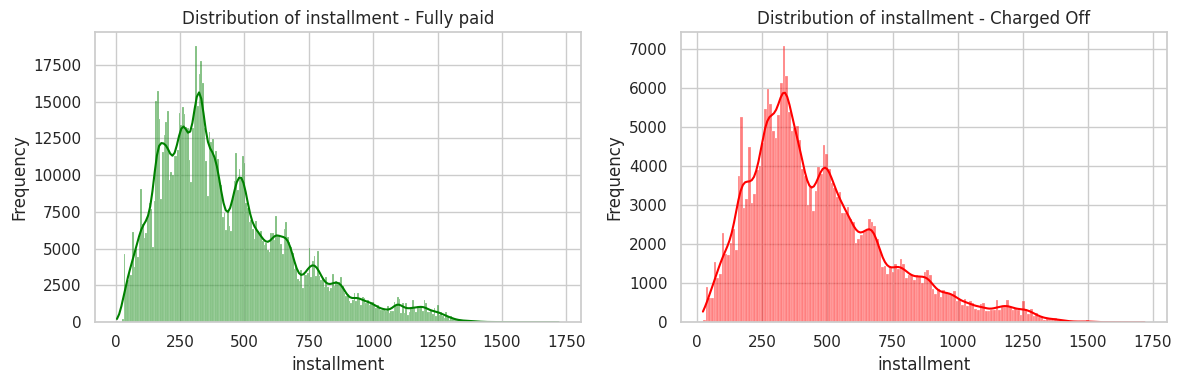

In [182]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['installment'], kde=True, color='green')
plt.title('Distribution of installment - Fully paid')
plt.xlabel('installment')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['installment'], kde=True, color='red')
plt.title('Distribution of installment - Charged Off')
plt.xlabel('installment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

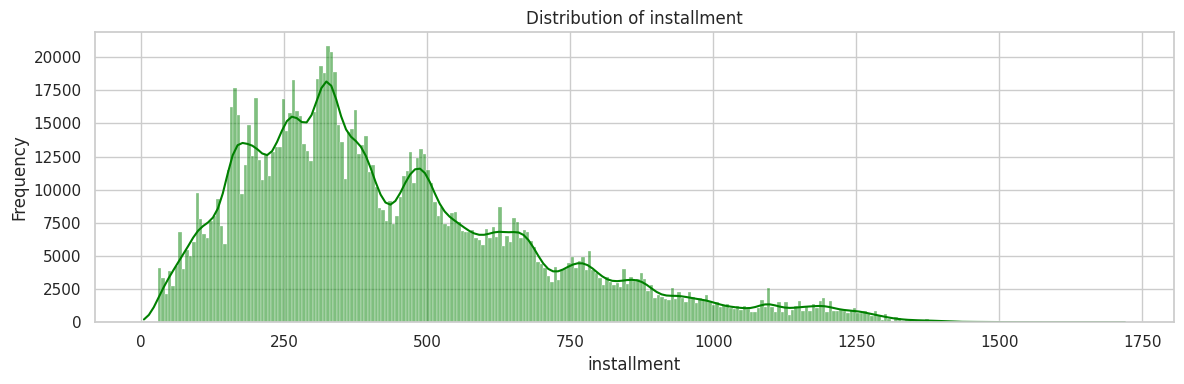

In [183]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['installment'], kde=True, color='green')
plt.title('Distribution of installment')
plt.xlabel('installment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

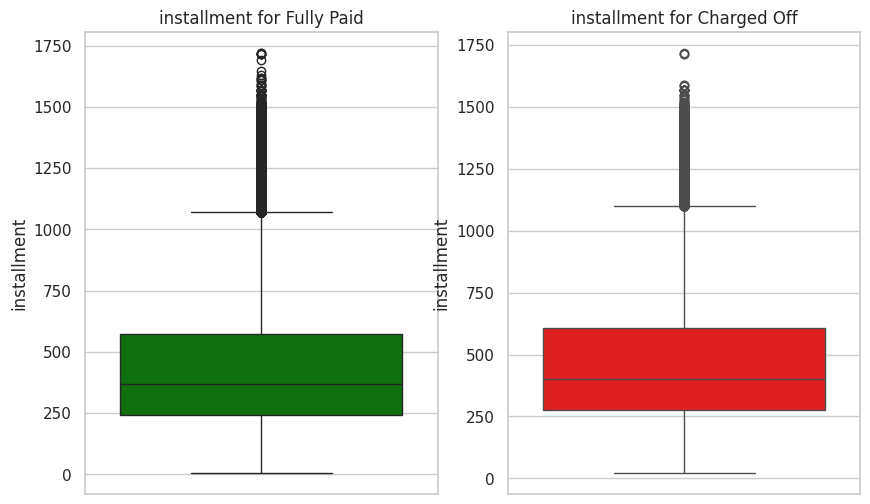

In [184]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['installment'].dropna(), color='green')
plt.title('installment for Fully Paid')
plt.ylabel('installment')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['installment'].dropna(), color='red')
plt.title('installment for Charged Off')
plt.ylabel('installment')

plt.show()  # Show all plots

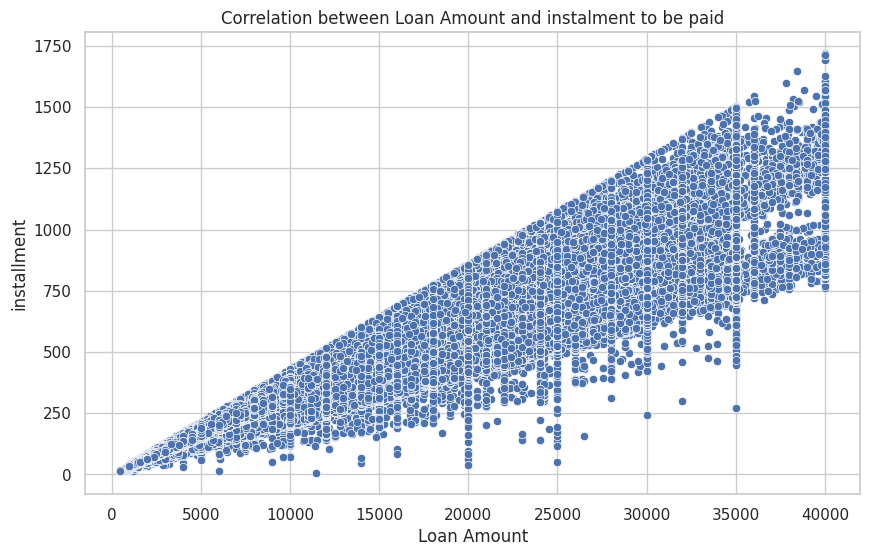

In [185]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='installment', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and instalment to be paid')
plt.xlabel('Loan Amount')
plt.ylabel('installment')

plt.show()

In [186]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['installment'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

,Percentile,Value,Difference
0,0.0,4.93000,NaN
1,5.0,108.73000,103.80000
2,10.0,157.59000,48.86000
3,15.0,186.61000,29.02000
4,20.0,216.83000,30.22000
5,25.0,248.48000,31.65000
6,30.0,273.30000,24.82000
7,35.0,301.68000,28.38000
8,40.0,324.61000,22.93000
9,45.0,344.95000,20.34000


**column: grade**

In [187]:
df['grade'].value_counts()

grade
B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: count, dtype: int64

In [188]:
print('Distribution of loan_status w.r.t grade')
df[['grade', 'loan_status']].value_counts()

Distribution of loan_status w.r.t grade


grade  loan_status
B      Fully Paid     340172
C      Fully Paid     296037
A      Fully Paid     220889
D      Fully Paid     139899
C      Charged Off     85649
D      Charged Off     61054
E      Fully Paid      57615
B      Charged Off     52569
E      Charged Off     36035
F      Fully Paid      17567
       Charged Off     14491
A      Charged Off     14201
G      Fully Paid       4572
       Charged Off      4560
Name: count, dtype: int64

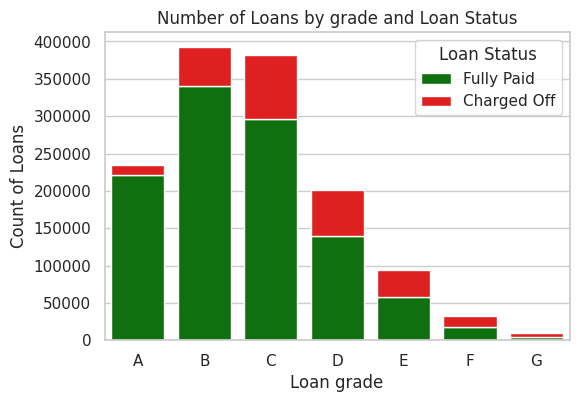

In [189]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of statuses across loan terms
ctab = pd.crosstab(df['grade'], df['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='grade', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='grade', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by grade and Loan Status')
plt.xlabel('Loan grade')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')

plt.show()

Seems like a lot of F, G and E grade loans are not getting paid off

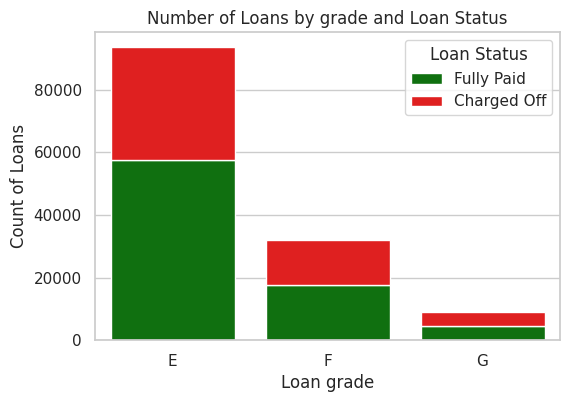

In [190]:
df_major_grade = df[(df.grade == 'F') | (df.grade == 'G') | (df.grade == 'E')]

ctab = pd.crosstab(df_major_grade['grade'], df_major_grade['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='grade', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='grade', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by grade and Loan Status')
plt.xlabel('Loan grade')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')

plt.show()